In [2]:
# Import Required Packages 
import pandas as pd
import numpy as np
import pandas_profiling
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn 
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [3]:
# TO print multiple outputs in single line
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [4]:
flight_data  = pd.read_csv("attachment_AirPassengers_lyst2096.csv")

In [5]:
flight_data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [11]:
flight_data.rename(columns={'#Passengers':'Passengers'}, inplace=True)

In [32]:
flight_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
Month         144 non-null datetime64[ns]
Passengers    144 non-null int64
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.3 KB


In [13]:
flight_data.describe()

,Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [22]:
flight_data['Month'] = flight_data['Month']+'-01'

In [27]:
flight_data['Month'] = flight_data['Month'].astype('datetime64[ns]')

In [33]:
flight_data.set_index('Month', drop=True)

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
1949-06-01,135
1949-07-01,148
1949-08-01,148
1949-09-01,136


In [55]:
from matplotlib import pyplot
def test_adfuller(timeseries):
    plt.figure(figsize=(20,5))
    plt.plot(flight_data['Passengers'], label='Actual')
    plt.plot(flight_data['Passengers'].rolling(12).mean(), label='Mean')
    plt.plot(flight_data['Passengers'].rolling(12).std(), label='Varience')
    plt.title('Rolling Mean & Standard Deviation')
    # plt.title('Air Passengers from 1949 to 1960 in thousands')
    pyplot.show()


    #Perform Dickey-Fuller test:
    from statsmodels.tsa.stattools import adfuller, kpss
    print("Results of Dickey-Fuller Test:")
    dftest=adfuller(timeseries,autolag='AIC')

    dfoutput=pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
 

From the sbove graph it is quite clear that the given time series is not stationary. 

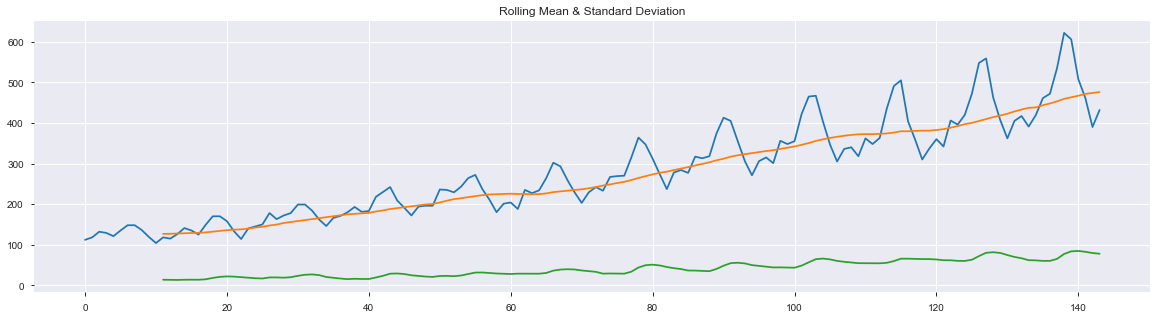

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [56]:
test_adfuller(flight_data['Passengers'])

In [72]:
ts=flight_data['Passengers']

In [58]:
moving_avg = ts.rolling(12).mean()

<Figure size 1440x360 with 0 Axes>

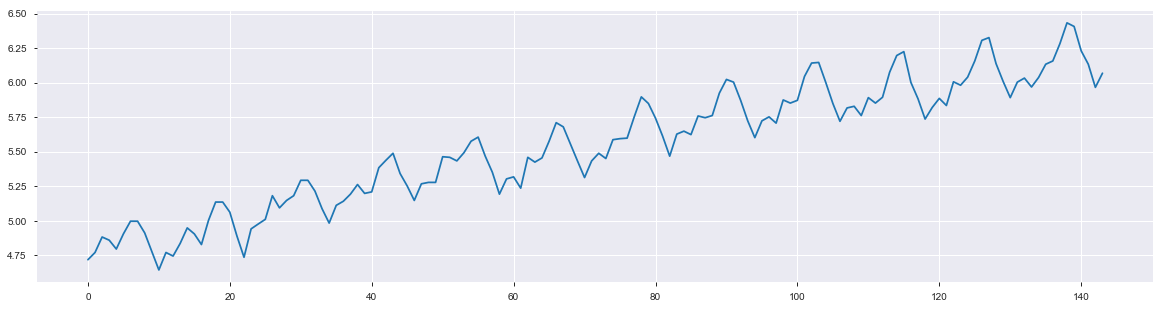

In [73]:
from matplotlib import pyplot
plt.figure(figsize=(20,5))
ts_log = np.log(ts)
plt.plot(ts_log)
pyplot.show()

In [76]:
moving_avg = ts_log.rolling(12).mean()
ts12= ts_log-moving_avg

<Figure size 1440x360 with 0 Axes>

Text(0.5, 1.0, 'Moving average')

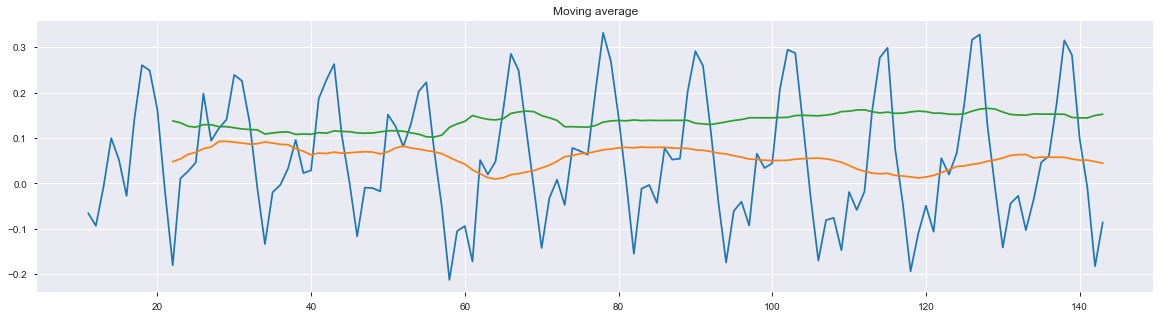

In [78]:
plt.figure(figsize=(20,5))
plt.plot(ts12, label='Actual')
plt.plot(ts12.rolling(12).mean(), label='Mean')
plt.plot(ts12.rolling(12).std(), label='Varience')
plt.title('Moving average')
# plt.title('Air Passengers from 1949 to 1960 in thousands')
pyplot.show()

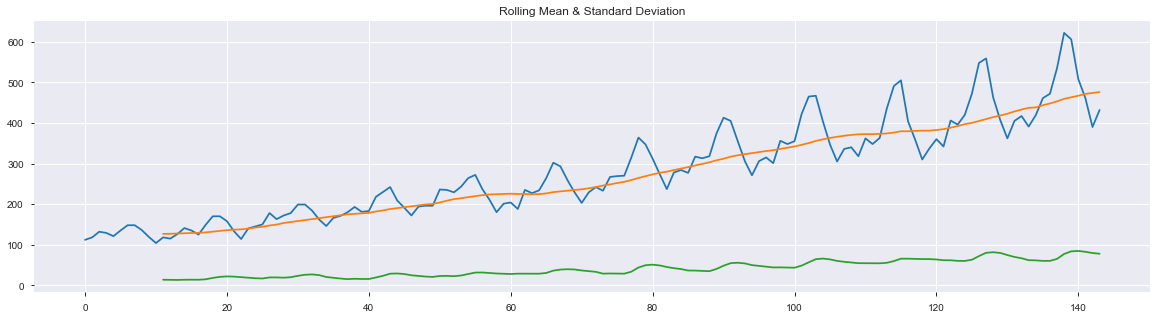

Results of Dickey-Fuller Test:
Test Statistic                  -3.484781
p-value                          0.008387
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [82]:
ts12.dropna(0, inplace=True)
test_adfuller(ts12)

<Figure size 1440x360 with 0 Axes>

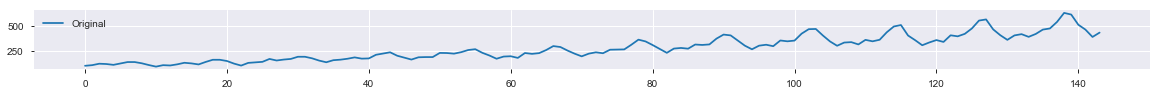

In [83]:
from statsmodels.tsa.seasonal import seasonal_decompose
plt.figure(figsize=(20,5))
decomposition = seasonal_decompose(ts_log, model = 'additive', freq = 30)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts, label='Original')
plt.legend(loc='best')
pyplot.show()

In [88]:
# test_adfuller(decomposition)
decomposition.trend

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
5           NaN
6           NaN
7           NaN
8           NaN
9           NaN
10          NaN
11          NaN
12          NaN
13          NaN
14          NaN
15     4.936121
16     4.954411
17     4.968657
18     4.977989
19     4.984916
20     4.991491
21     4.997344
22     5.003014
23     5.012110
24     5.024933
25     5.041341
26     5.060990
27     5.082772
28     5.105202
29     5.122640
         ...   
114    5.978907
115    5.981843
116    5.981483
117    5.978982
118    5.974206
119    5.971853
120    5.977195
121    5.989207
122    6.004238
123    6.022057
124    6.042871
125    6.059265
126    6.069599
127    6.075481
128    6.076562
129         NaN
130         NaN
131         NaN
132         NaN
133         NaN
134         NaN
135         NaN
136         NaN
137         NaN
138         NaN
139         NaN
140         NaN
141         NaN
142         NaN
143         NaN
Name: Passengers, Length

<Figure size 1440x360 with 0 Axes>

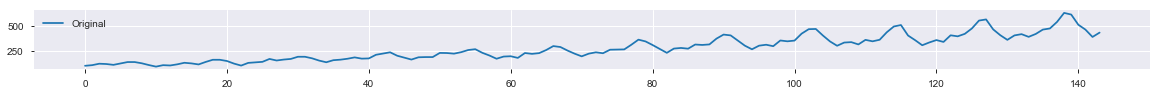

In [90]:
from statsmodels.tsa.seasonal import seasonal_decompose
plt.figure(figsize=(20,5))
decomposition1 = seasonal_decompose(ts_log, model = 'additive', freq = 30)

trend1 = decomposition1.trend
seasonal1 = decomposition1.seasonal
residual1 = decomposition1.resid

plt.subplot(411)
plt.plot(ts, label='Original')
plt.legend(loc='best')
pyplot.show()

<Figure size 1440x360 with 0 Axes>

Text(0.5, 1.0, 'trend1')

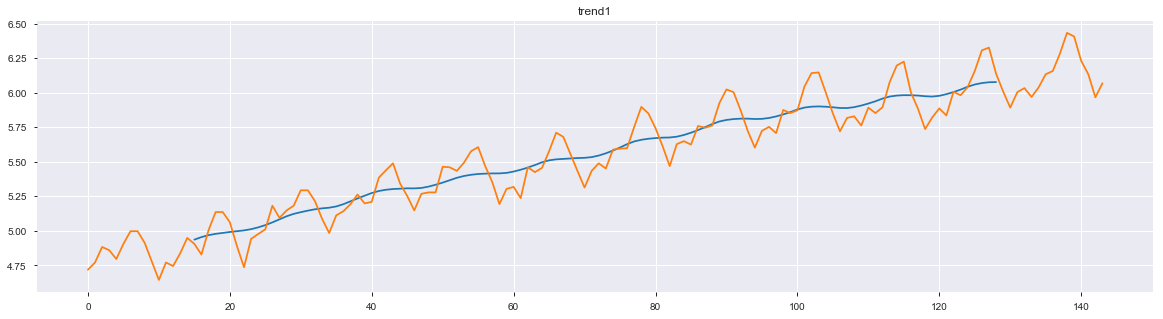

In [92]:
plt.figure(figsize=(20,5))
plt.plot(trend1, label='trend1')
plt.plot(ts_log, label='Log Of passengers')
# plt.plot(ts12.rolling(12).mean(), label='Mean')
# plt.plot(ts12.rolling(12).std(), label='Varience')
plt.title('trend1')

<Figure size 1440x360 with 0 Axes>

Text(0.5, 1.0, 'seasonal1')

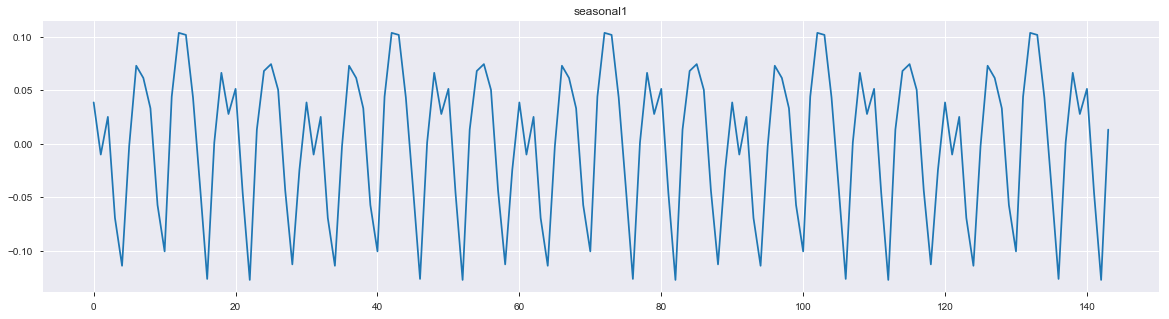

In [96]:
plt.figure(figsize=(20,5))
plt.plot(seasonal1, label='trend1')
# plt.plot(ts_log, label='Log Of passengers')
plt.plot(ts12.rolling(12).mean(), label='Mean')
plt.plot(ts12.rolling(12).std(), label='Varience')
plt.title('seasonal1')

<Figure size 1440x360 with 0 Axes>

Text(0.5, 1.0, 'residual1')

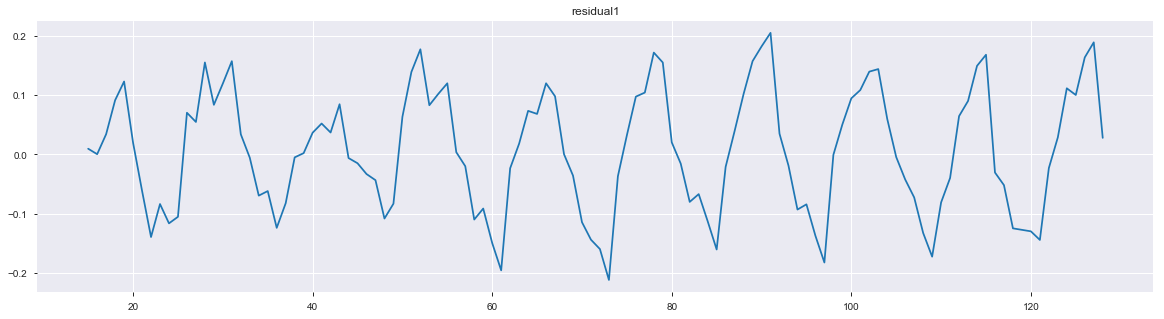

In [95]:
plt.figure(figsize=(20,5))
plt.plot(residual1, label='residual1')
# plt.plot(ts_log, label='Log Of passengers')
# plt.plot(ts12.rolling(12).mean(), label='Mean')
# plt.plot(ts12.rolling(12).std(), label='Varience')
plt.title('residual1')